In [1]:
import pandas as pd
import numpy as np
import re

# para pintar
import pylab as plt
import seaborn as sns

# para que salga el grafico
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', 30)

In [3]:
data_stat=pd.read_csv('./sharks_clean.csv',  encoding='ANSI', sep=';')

data_stat.head()

,case_number,date,type,country,location,sex,fatal,investigator_or_source,pdf,href_formula,href,case_number.a,case_number.b,original_order,unnamed.a,unnamed.b,years,area,activity,name,age,injury,time,species
0,2912,2018-06-25,BOAT,UNITED STATES OF AMERICA,"OCEANSIDE, SAN DIEGO COUNTY",F,N,"R. COLLIER, GSAF",2018.06.25-WOLFE.PDF,HTTP://SHARKATTACKFILE.NET/SPREADSHEETS/PDF_DI...,HTTP://SHARKATTACKFILE.NET/SPREADSHEETS/PDF_DI...,2018.06.25,2018.06.25,6303.0,UNKNOWN,UNKNOWN,2018,CALIFORNIA,PADDLING,JULIE WOLFE,57,NO INJURY,18H00,WHITE
1,2911,2018-06-08,UNPROVOKED,AUSTRALIA,ARRAWARRA HEADLAND,M,N,"B. MYATT, GSAF",2018.06.08-ARRAWARRA.PDF,HTTP://SHARKATTACKFILE.NET/SPREADSHEETS/PDF_DI...,HTTP://SHARKATTACKFILE.NET/SPREADSHEETS/PDF_DI...,2018.06.08,2018.06.08,6300.0,UNKNOWN,UNKNOWN,2018,NEW SOUTH WALES,SURFING,OTHER,UNKNOWN,MINOR INJURY,UNKNOWN,UNKNOWN
2,2910,2018-06-04,PROVOKED,MEXICO,LA TICLA,M,N,A .KIPPER,2018.06.04-RAMOS.PDF,HTTP://SHARKATTACKFILE.NET/SPREADSHEETS/PDF_DI...,HTTP://SHARKATTACKFILE.NET/SPREADSHEETS/PDF_DI...,2018.06.04,2018.06.04,6299.0,UNKNOWN,UNKNOWN,2018,COLIMA,DIVING,GUSTAVO RAMOS,UNKNOWN,LACERATION,UNKNOWN,TIGER
3,2909,2018-06-03,UNPROVOKED,BRAZIL,"PIEDADE BEACH, RECIFE",M,Y,"DIARIO DE PERNAMBUCO, 6/4/2018",2018.06.03.A-DASILVA.PDF,HTTP://SHARKATTACKFILE.NET/SPREADSHEETS/PDF_DI...,HTTP://SHARKATTACKFILE.NET/SPREADSHEETS/PDF_DI...,2018.06.03.A,2018.06.03.A,6297.0,UNKNOWN,UNKNOWN,2018,PERNAMBUCO,SWIM,JOSE ERNESTO DA SILVA,18,FATAL,UNKNOWN,TIGER
4,2908,2018-05-27,UNPROVOKED,UNITED STATES OF AMERICA,"LIGHHOUSE POINT PARK, PONCE INLET, VOLUSIA COUNTY",M,N,"K. MCMURRAY, TRACKINGSHARKS.COM",2018.05.27-PONCE.PDF,HTTP://SHARKATTACKFILE.NET/SPREADSHEETS/PDF_DI...,HTTP://SHARKATTACKFILE.NET/SPREADSHEETS/PDF_DI...,2018.05.27,2018.05.27,6296.0,UNKNOWN,UNKNOWN,2018,FLORIDA,FISHING,OTHER,52,MINOR INJURY,UNKNOWN,LEMON


In [4]:
data= data_stat

In [5]:
data2=data.groupby("country")[("country", "sex")].count()
data2

C:\Users\David MC\AppData\Local\Temp\ipykernel_148\815873872.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data2=data.groupby("country")[("country", "sex")].count()


,country,sex
country,,
AMERICAN SAMOA,2,2
ANTIGUA AND BARBUDA,1,1
ARGENTINA,1,1
AUSTRALIA,731,731
BAHAMAS,39,39
...,...,...
URUGUAY,1,1
VANUATU,2,2
VENEZUELA,3,3


In [6]:
data3=data.groupby(['sex'])[("sex")].count()

data3

sex
F           339
M          2338
UNKNOWN     235
Name: sex, dtype: int64

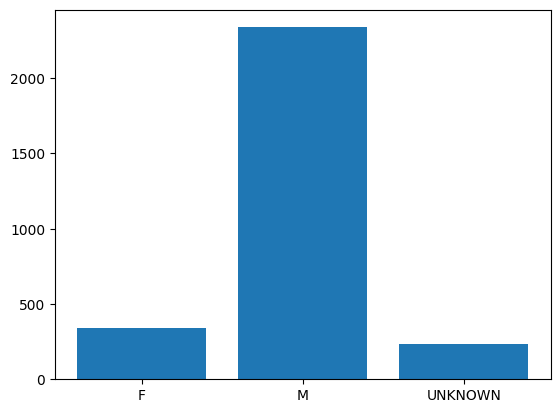

In [7]:
#plt.figure(figsize=(10,6))

y_pos = np.arange(len(data3))

# Create bars
plt.bar(y_pos, data3)

# Create names on the x-axis
plt.xticks(y_pos, data3.index)

# Show graphic
plt.show()

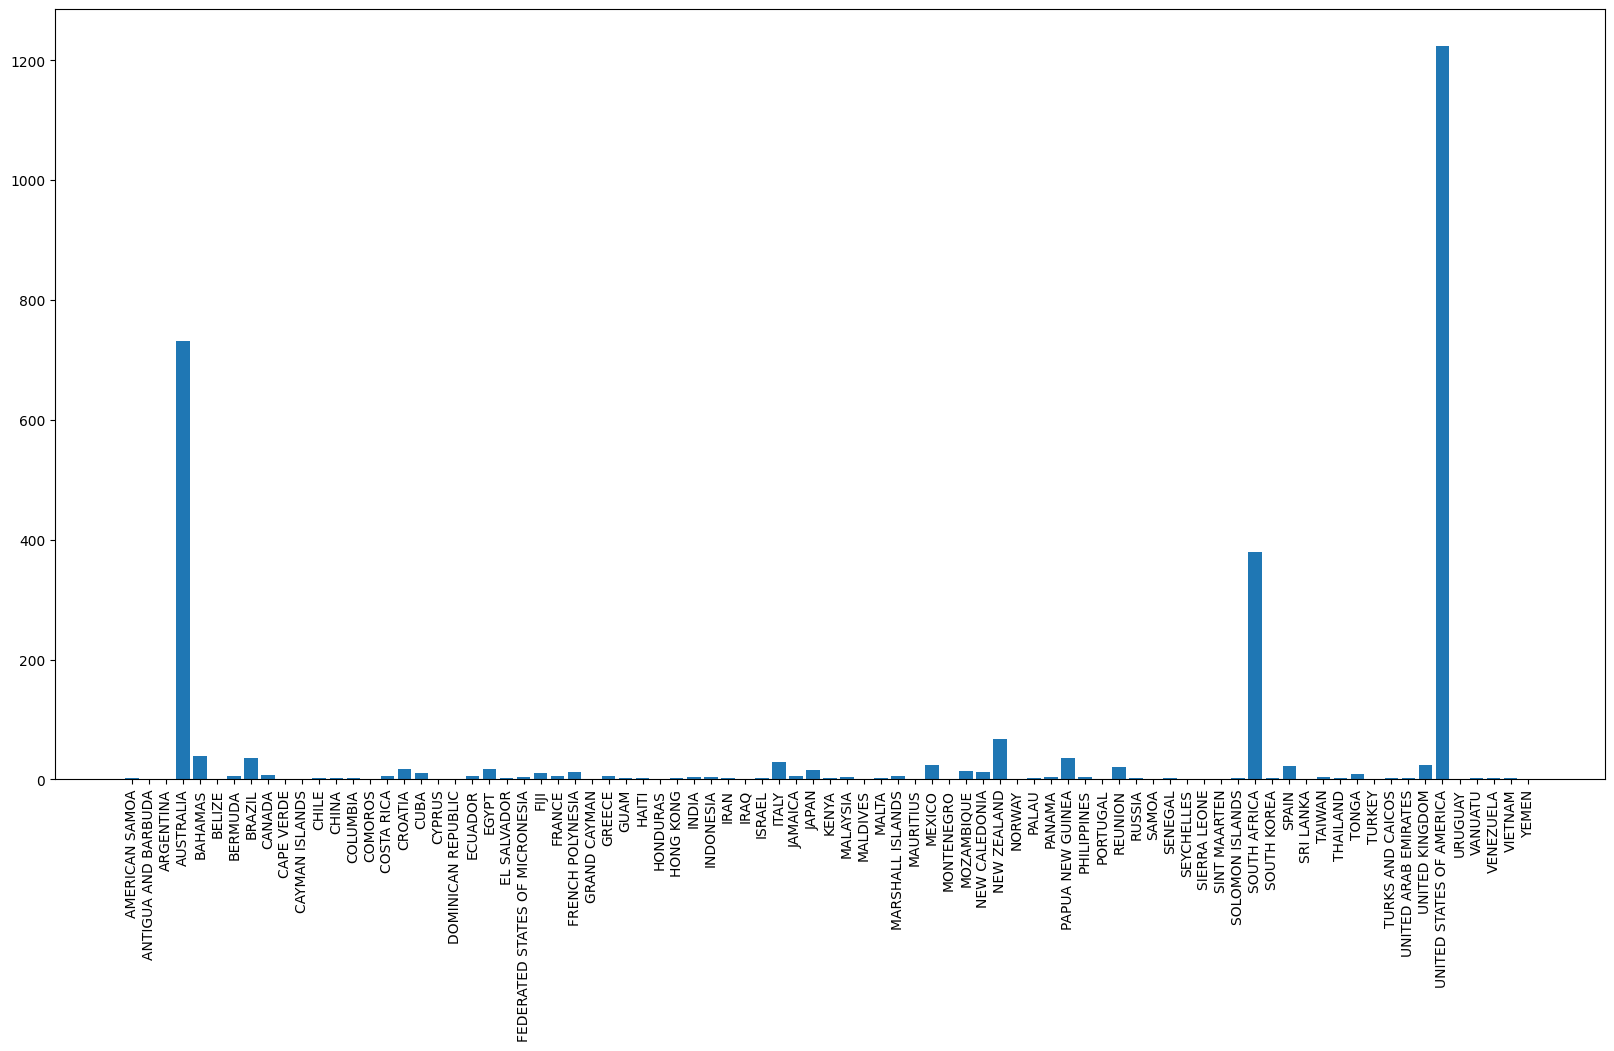

In [8]:
plt.figure(figsize=(20,10))

y_pos = np.arange(len(data2.country))

# Create bars
plt.bar(y_pos, data2.country)

# Create names on the x-axis
plt.xticks(y_pos, data2.index)
plt.xticks(rotation = 90)

# Show graphic
plt.show()

In [9]:
data4=data.groupby(['species'])[('species','age')].count()

data4

C:\Users\David MC\AppData\Local\Temp\ipykernel_148\1229005622.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data4=data.groupby(['species'])[('species','age')].count()


,species,age
species,,
BASKING,6,6
BLACK,90,90
BLUE,40,40
BOA,8,8
BROADNOSE,3,3
BROWN,3,3
BULL,132,132
CARIBBEAN,12,12
COOKIECUTTER,1,1


In [11]:
data4.drop(data4[data4['species'] >= 1300].index, inplace = True)

#data4=data4.drop('age')

#data= data.drop('years', axis=1)

data4

,species,age
species,,
BASKING,6,6
BLACK,90,90
BLUE,40,40
BOA,8,8
BROADNOSE,3,3
BROWN,3,3
BULL,132,132
CARIBBEAN,12,12
COOKIECUTTER,1,1


In [21]:
sum_species=data4.species.sum()

sum_species

data4.age=data4.species*100/sum_species

data4.drop(data4[data4['species'] <= 10].index, inplace = True)

data4

,species,age
species,,
BLACK,90,6.342495
BLUE,40,2.818887
BULL,132,9.302326
CARIBBEAN,12,0.845666
GREY,52,3.664553
LEMON,26,1.832276
NURSE,42,2.959831
PORT,12,0.845666
SAND,45,3.171247


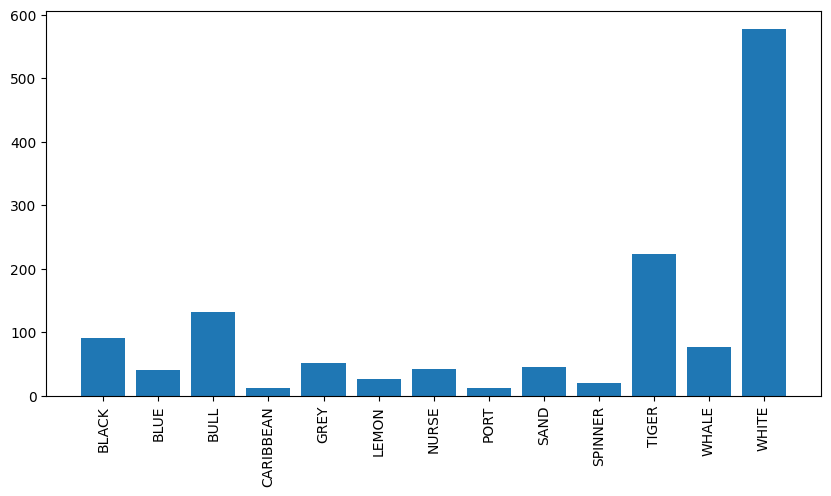

In [22]:
plt.figure(figsize=(10,5))

y_pos = np.arange(len(data4.species))

# Create bars
plt.bar(y_pos, data4.species)

# Create names on the x-axis
plt.xticks(y_pos, data4.index)
plt.xticks(rotation = 90)

# Show graphic
plt.show()

In [ ]:
data4=data[['sex','fatal']].copy()

data4['unos']=1


pd.pivot_table(data4, values='unos', index='sex', columns='fatal', aggfunc='count')

fatal,N,UNKNOWN,Y
sex,,,
F,245,45,49
M,1753,294,291
UNKNOWN,169,56,10


In [43]:
data10=data.groupby(['age'])[('age')].count()

data10

age
10          34
11          18
12          37
13          47
14          49
          ... 
77           2
8           13
84           1
9           18
UNKNOWN    943
Name: age, Length: 74, dtype: int64

In [50]:
data10.sort_values( inplace=True)

data10.drop(data10[data10 >= 500].index, inplace = True)

data10

age
84     1
75     1
74     1
3      1
64     1
      ..
21    72
20    75
17    80
18    81
19    84
Name: age, Length: 73, dtype: int64

In [112]:


data10

country
AMERICAN SAMOA           2
ANTIGUA AND BARBUDA      1
ARGENTINA                1
AUSTRALIA              731
BAHAMAS                 39
                      ... 
VANUATU                  2
VENEZUELA                3
VIETNAM                  3
YEMEN                    1
suma                     1
Name: country, Length: 84, dtype: int64

In [148]:
data50=data[['age']].copy()

data50.drop(data50[data50.age=='UNKNOWN'].index, inplace = True)

data50["age"] = data50["age"].astype(str).astype(int)
data50.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 1969 entries, 0 to 2896
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     1969 non-null   int32
dtypes: int32(1)
memory usage: 23.1 KB


<AxesSubplot:xlabel='age'>

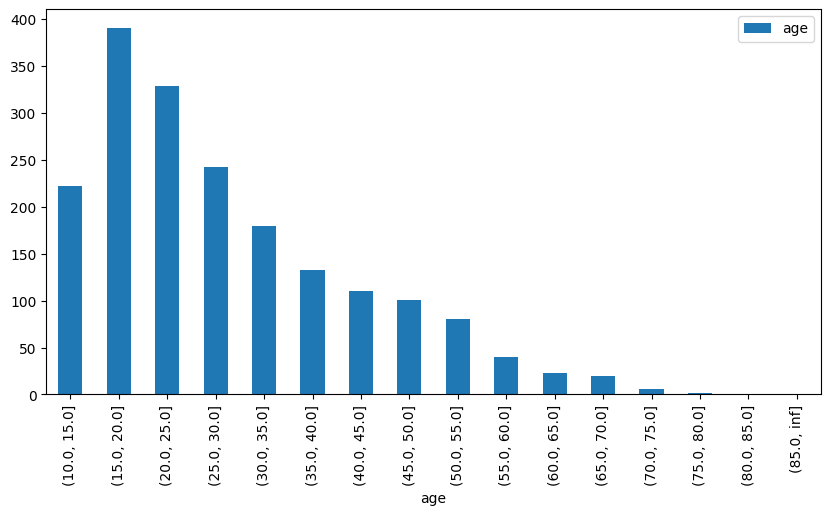

In [149]:
age_groups = pd.cut(data50['age'], bins=[10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85, np.inf])

data50.groupby(age_groups).aggregate('count').plot.bar(figsize=(10,5))



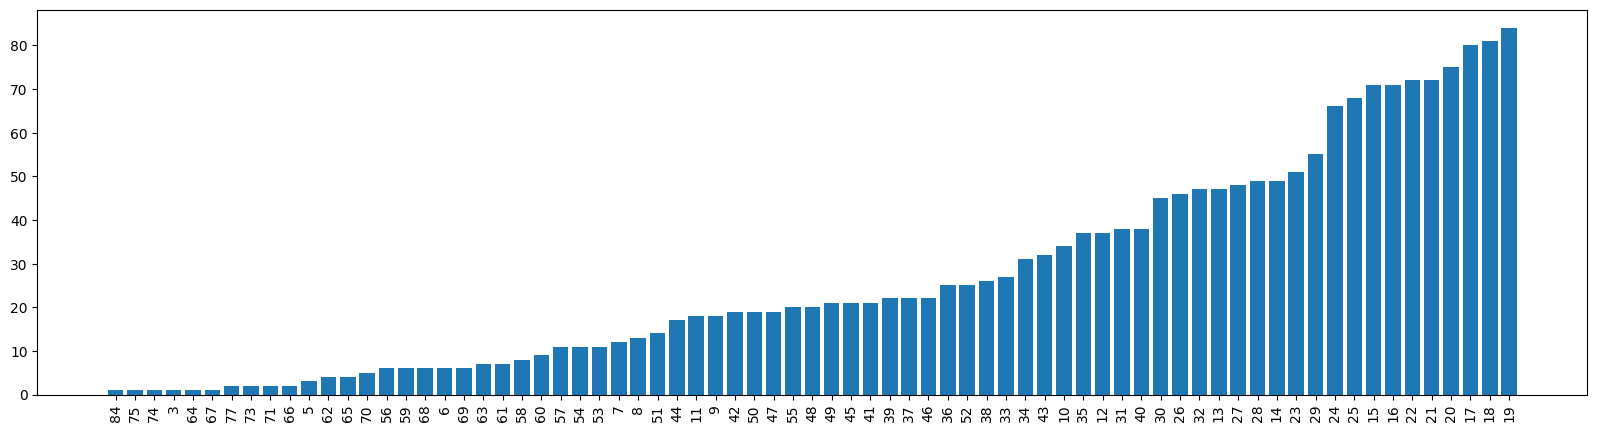

In [53]:
plt.figure(figsize=(20,5))

y_pos = np.arange(len(data10))

# Create bars
plt.bar(y_pos, data10)

# Create names on the x-axis
plt.xticks(y_pos, data10.index)
plt.xticks(rotation = 90)

# Show graphic
plt.show()

In [61]:
data20=data.groupby(['country'])[('country')].count()

data20.sort_values( inplace=True)

data20.drop(data20[data20 <5].index, inplace = True)

data20

country
ECUADOR                        5
JAMAICA                        5
BERMUDA                        5
FRANCE                         5
MARSHALL ISLANDS               6
COSTA RICA                     6
GREECE                         6
CANADA                         8
TONGA                          9
CUBA                          10
FIJI                          10
FRENCH POLYNESIA              13
NEW CALEDONIA                 13
MOZAMBIQUE                    14
JAPAN                         16
CROATIA                       18
EGYPT                         18
REUNION                       20
SPAIN                         23
MEXICO                        24
UNITED KINGDOM                24
ITALY                         29
BRAZIL                        35
PAPUA NEW GUINEA              35
BAHAMAS                       39
NEW ZEALAND                   68
SOUTH AFRICA                 380
AUSTRALIA                    731
UNITED STATES OF AMERICA    1224
Name: country, dtype: int64

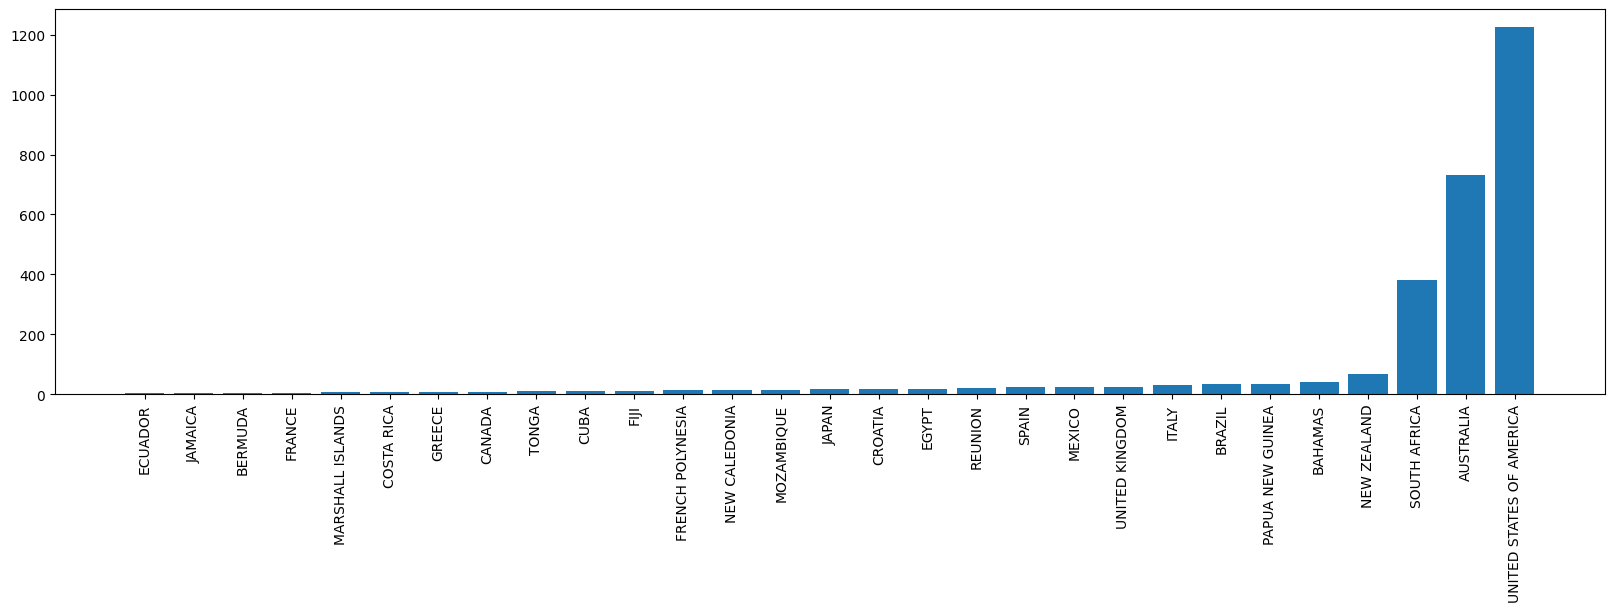

In [62]:
plt.figure(figsize=(20,5))

y_pos = np.arange(len(data20))

# Create bars
plt.bar(y_pos, data20)

# Create names on the x-axis
plt.xticks(y_pos, data20.index)
plt.xticks(rotation = 90)

# Show graphic
plt.show()

In [66]:
data30=data.groupby(['fatal'])[('fatal')].count()

data30.sort_values( inplace=True)

data30.drop(data30[data30 =='UNKNOWN'].index, inplace = True)

data30

fatal
Y           350
UNKNOWN     395
N          2167
Name: fatal, dtype: int64

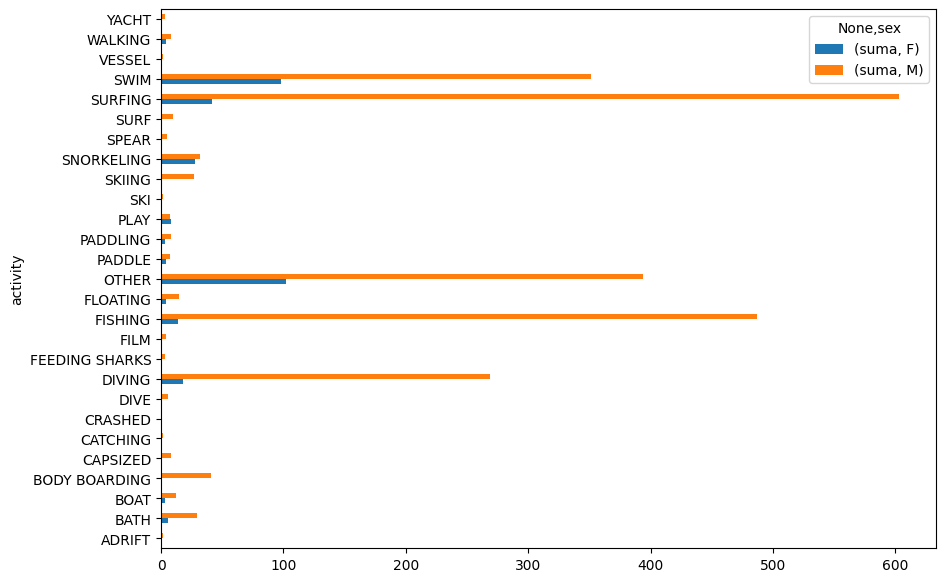

In [97]:
data30=data[['activity','sex']].copy()

data30.drop(data30[data30.sex=='UNKNOWN'].index, inplace = True)

data30['suma']=1
data30=data30.groupby(['activity','sex']).aggregate('count').unstack().plot.barh(figsize=(10,7))



<AxesSubplot:ylabel='species'>

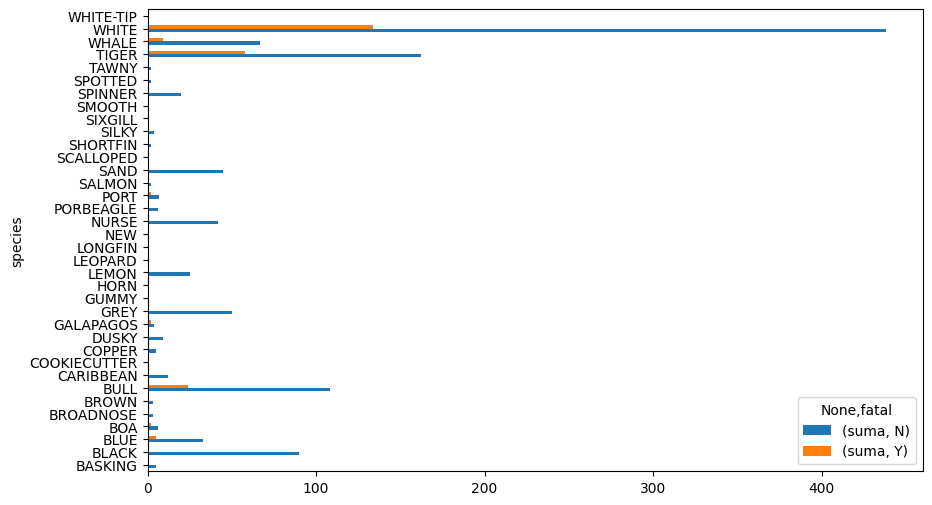

In [152]:

data40=data[['species','fatal']].copy()

data40.drop(data40[(data40.species=='UNKNOWN')].index, inplace = True)
data40.drop(data40[data40.fatal=='UNKNOWN'].index, inplace = True)

data40['suma']=1
data40=data40.groupby(['species','fatal']).aggregate('count').unstack().plot.barh(figsize=(10,6))

data40